**Object creation**

(https://pandas.pydata.org/docs/user_guide/10min.html)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df2 = pd.DataFrame(
{
    "A":1.0,
    "B":pd.Timestamp("20230101"),
    "C":pd.Series(1,index=list(range(4)),dtype='float32'),
    "D":pd.array([3]*4,dtype='float32'),
    "F":pd.Categorical(["Alpha","Beta","Gamma","Delta"])
})
df2

,A,B,C,D,F
0,1.0,2023-01-01,1.0,3.0,Alpha
1,1.0,2023-01-01,1.0,3.0,Beta
2,1.0,2023-01-01,1.0,3.0,Gamma
3,1.0,2023-01-01,1.0,3.0,Delta


In [3]:

df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D           float32
F          category
dtype: object

In [4]:
dates = pd.date_range("20230101",periods=6)
df = pd.DataFrame(np.random.rand(6,4),index=dates,columns=list("ABCD"))
df

,A,B,C,D
2023-01-01,0.517431,0.114525,0.091373,0.971755
2023-01-02,0.837076,0.351114,0.946331,0.509177
2023-01-03,0.198019,0.978646,0.872683,0.024569
2023-01-04,0.206478,0.170678,0.659245,0.671850
2023-01-05,0.659888,0.567951,0.722190,0.303111
2023-01-06,0.399511,0.862525,0.881052,0.925900


**Viewing data**

In [5]:
df.head()

,A,B,C,D
2023-01-01,0.517431,0.114525,0.091373,0.971755
2023-01-02,0.837076,0.351114,0.946331,0.509177
2023-01-03,0.198019,0.978646,0.872683,0.024569
2023-01-04,0.206478,0.170678,0.659245,0.671850
2023-01-05,0.659888,0.567951,0.722190,0.303111


In [6]:
df.tail()

,A,B,C,D
2023-01-02,0.837076,0.351114,0.946331,0.509177
2023-01-03,0.198019,0.978646,0.872683,0.024569
2023-01-04,0.206478,0.170678,0.659245,0.671850
2023-01-05,0.659888,0.567951,0.722190,0.303111
2023-01-06,0.399511,0.862525,0.881052,0.925900


In [7]:
df.index

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

**DataFrame.to_numpy()**  gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column. When you call DataFrame.to_numpy(), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being object, which requires casting every value to a Python object.

In [9]:
df2.to_numpy()

array([[1.0, Timestamp('2023-01-01 00:00:00'), 1.0, 3.0, 'Alpha'],
       [1.0, Timestamp('2023-01-01 00:00:00'), 1.0, 3.0, 'Beta'],
       [1.0, Timestamp('2023-01-01 00:00:00'), 1.0, 3.0, 'Gamma'],
       [1.0, Timestamp('2023-01-01 00:00:00'), 1.0, 3.0, 'Delta']],
      dtype=object)

In [10]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.469734,0.507573,0.695479,0.567727
std,0.253550,0.358890,0.314876,0.366289
min,0.198019,0.114525,0.091373,0.024569
25%,0.254736,0.215787,0.674981,0.354627
50%,0.458471,0.459533,0.797437,0.590514
75%,0.624273,0.788881,0.878959,0.862388
max,0.837076,0.978646,0.946331,0.971755


In [11]:
df.T

,2023-01-01,2023-01-02,2023-01-03,2023-01-04,2023-01-05,2023-01-06
A,0.517431,0.837076,0.198019,0.206478,0.659888,0.399511
B,0.114525,0.351114,0.978646,0.170678,0.567951,0.862525
C,0.091373,0.946331,0.872683,0.659245,0.722190,0.881052
D,0.971755,0.509177,0.024569,0.671850,0.303111,0.925900


In [12]:
df.sort_index(axis=1,ascending=False)

,D,C,B,A
2023-01-01,0.971755,0.091373,0.114525,0.517431
2023-01-02,0.509177,0.946331,0.351114,0.837076
2023-01-03,0.024569,0.872683,0.978646,0.198019
2023-01-04,0.671850,0.659245,0.170678,0.206478
2023-01-05,0.303111,0.722190,0.567951,0.659888
2023-01-06,0.925900,0.881052,0.862525,0.399511


In [13]:
df.sort_values(by='B')

,A,B,C,D
2023-01-01,0.517431,0.114525,0.091373,0.971755
2023-01-04,0.206478,0.170678,0.659245,0.671850
2023-01-02,0.837076,0.351114,0.946331,0.509177
2023-01-05,0.659888,0.567951,0.722190,0.303111
2023-01-06,0.399511,0.862525,0.881052,0.925900
2023-01-03,0.198019,0.978646,0.872683,0.024569


__Selection__

In [14]:
df['A']

2023-01-01    0.517431
2023-01-02    0.837076
2023-01-03    0.198019
2023-01-04    0.206478
2023-01-05    0.659888
2023-01-06    0.399511
Freq: D, Name: A, dtype: float64

In [15]:
df[0:3]

,A,B,C,D
2023-01-01,0.517431,0.114525,0.091373,0.971755
2023-01-02,0.837076,0.351114,0.946331,0.509177
2023-01-03,0.198019,0.978646,0.872683,0.024569


In [16]:
df['2023-01-01':'2023-01-03']

,A,B,C,D
2023-01-01,0.517431,0.114525,0.091373,0.971755
2023-01-02,0.837076,0.351114,0.946331,0.509177
2023-01-03,0.198019,0.978646,0.872683,0.024569


<b>Selection by label</b>

In [17]:
df.loc[dates[0]]

A    0.517431
B    0.114525
C    0.091373
D    0.971755
Name: 2023-01-01 00:00:00, dtype: float64

In [18]:
df.loc[:,["A","B"]]

,A,B
2023-01-01,0.517431,0.114525
2023-01-02,0.837076,0.351114
2023-01-03,0.198019,0.978646
2023-01-04,0.206478,0.170678
2023-01-05,0.659888,0.567951
2023-01-06,0.399511,0.862525


In [19]:
df.loc["2023-01-01":"2023-01-03",["A","B"]]

,A,B
2023-01-01,0.517431,0.114525
2023-01-02,0.837076,0.351114
2023-01-03,0.198019,0.978646


In [20]:
df.loc["2023-01-01",["A","B"]]

A    0.517431
B    0.114525
Name: 2023-01-01 00:00:00, dtype: float64

In [21]:
df.loc[dates[0],"A"]

0.5174305181838549

In [22]:
<b>Selection by position</b>

SyntaxError: invalid syntax (1536854253.py, line 1)

<b>Selection by position</b>

In [ ]:
df.iloc[3]

In [ ]:
df.iloc[3:5,0:2]

In [ ]:
df.iloc[[1,2,4],[0,2]]

In [ ]:
df.iloc[:,1:3]

In [ ]:
df

In [ ]:
df.iloc[1:3,:]

In [ ]:
df.iloc[:,1:3]

In [ ]:
#For getting a value explicitly:
df.iloc[1,1]

In [ ]:
#For getting fast access to a scalar (equivalent to the prior method):
df.iat[1,1]

In [ ]:
#diff between loc vs iloc vs iat
#https://stackoverflow.com/questions/28757389/pandas-loc-vs-iloc-vs-at-vs-iat

__Boolean indexing__

In [ ]:
df[df['A']>0]

In [ ]:
df[df>0]

In [ ]:
df_g =["Alpha","Beta","Gamma","Deleta","Eplison","Zeta"]
df4 = pd.DataFrame([df_g])
df4
df4[df4.isin(["two","three"])]

In [ ]:
df4[df4.isin(["Alpha"])]

In [ ]:
df5 = df.copy()
df5["E"] =["Alpha","Beta","Gamma","Deleta","Eplison","Zeta"]

In [ ]:
df5

In [ ]:
df5[df5["E"].isin(["Zeta"])]

__Setting__    

Setting a new column automatically aligns the data by the indexes:

In [ ]:
df.mean()

In [ ]:
dates = pd.date_range("20230101",periods=6)
df7 = pd.DataFrame(np.random.rand(6,4),index=dates,columns=list("ABCD"))
df7

In [ ]:
df7.mean()

In [ ]:
df7.mean(1)

In [ ]:
s = pd.Series([1,3,5,np.nan,6,8],index=dates).shiftt(2)
s

In [ ]:
df.sub(s,axis="index")

In [ ]:
df.apply(np.cumsum)

In [ ]:
df.apply(lambda x : x.max()- x.min())


__Histogramming__

In [ ]:
s2 = pd.Series(np.random.randint(0,7,size=10))
s2

In [ ]:
s.value_counts()

__String Methods__

Series is equipped with a set of string processing methods in the str attribute that make it easy to operate on each element of the array, as in the code snippet below. Note that pattern-matching in str generally uses regular expressions by default (and in some cases always uses them). See more at Vectorized String Methods.

In [ ]:
s5 = pd.Series(["A","B","C","AaBa","Baca",np.nan,"CABA","dog","cat"])
s5

In [ ]:
s5.str.lower()

In [ ]:
s5.str.upper()

In [ ]:
__Merge__

__Merge__

Concat
pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

In [ ]:
df_merge = pd.DataFrame(np.random.randn(10,4))
df

In [ ]:
#Concatenating pandas objects together along an axis with concat():

In [ ]:
piece = [df[:3],df[3:7],df[7:]]
piece

In [ ]:
pd.concat(piece)

__Join__

merge() enables SQL style join types along specific columns. See the Database style joining section

In [ ]:
left = pd.DataFrame({"key":['foo','foo'],"lval":[1,2]})
right = pd.DataFrame({"key":['foo','foo'],"rval":[4,5]})

In [ ]:
left

In [ ]:
right

In [ ]:
pd.merge(left,right,on="key")

In [ ]:
l1 = pd.DataFrame({"key":["foo","bar"],"lval":[1,2]})
r1 = pd.DataFrame({"key":["foo","bar"],"rval":[4,5]})

In [ ]:
l1

In [ ]:
r1

In [ ]:
pd.merge(l1,r1,on='key')

__Grouping__

By “group by” we are referring to a process involving one or more of the following steps:

     - Splitting the data into groups based on some criteria
     - Applying a function to each group independently
     - Combining the results into a data structure
    

In [ ]:
gr = pd.DataFrame({
    "A" : ["foo","bar","foo","bar","foo","bar","foo","foo"],
    "B" :["one","one","two","three","two","two","one","three"],
    "C" : np.random.randn(8),
    "D" : np.random.randn(8),
})
gr

In [ ]:
#Grouping and then applying the sum() function to the resulting groups:
gr.groupby("A")[["C","D"]].sum()

In [ ]:
#Grouping by multiple columns forms a hierarchical index, and again we can apply the sum() function:

In [ ]:
gr.groupby(["A","B"]).sum()


In [ ]:
gr.groupby(["A","B"]).mean()

__Reshaping__

See the sections on Hierarchical Indexing and Reshaping.

In [ ]:
#zip example
Name = ['tom','jerry','nick']
Age = [25,23,21]
list_tuple = list(zip(Name,Age))
list_tuple

In [ ]:
# Converting lists of tuples into
# pandas Dataframe.
z = pd.DataFrame(list_tuple,columns=['Name','Age'])
z

In [ ]:
tup = list(zip(["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],))
tup

In [ ]:
inde = pd.MultiIndex.from_tuples(tup,names=['first','second'])
inde

In [ ]:
p = pd.DataFrame(np.random.randn(8,2),index=inde,columns=["A","B"])
p

In [ ]:
#The stack() method “compresses” a level in the DataFrame’s columns:
s = p.stack()
s

In [ ]:
#With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of stack() is unstack(), which by default unstacks the last level:
s.unstack()

In [ ]:
s.unstack(1)

In [ ]:
s.unstack(0)

**Pivot tables**

In [ ]:
df_p = pd.DataFrame({
    "A" : ["one","one","two","three"]*3,
    "B" : ["A","B","C"]*4,
    "C" : ["foo","foo","foo","bar","bar","bar"]*2,
    "D" : np.random.randn(12),
    "E" : np.random.randn(12),
 })
df_p

In [ ]:
# for more : https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot
piv = pd.pivot_table(df,values="D",index=["A","B"],columns=["C"])
piv

**Time series**

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the Time Series section.

In [ ]:
rng  = pd.date_range("1/1/2023",periods=100,freq="S")
rng

In [ ]:
time_s = pd.Series(np.random.randint(0,500,len(rng)),index=rng)
time_s

In [ ]:
#https://stackoverflow.com/questions/35339139/what-values-are-valid-in-pandas-freq-tags

In [ ]:
ts1 = pd.date_range("2023-01-01", periods=10,freq='S')
ts1

In [ ]:
ser = pd.Series(np.random.randint(0,500,len(ts1)),index=ts1)
ser
ser.resample('5Min').min()

In [ ]:
ts1_utc = ser.tz_localize("UTC")
ts1_utc

In [ ]:
ts1_utc.tz_convert("Asia/Kolkata")

In [ ]:
tz_2 = pd.date_range("2023-01-01",periods=5,freq='M')
ser2 = pd.Series(np.random.randn(len(tz_2)),index = tz_2)
ser2

In [ ]:
ps = tz_2.to_period()
ps

In [ ]:
ps.to_timestamp()

In [ ]:
con = pd.period_range("2022Q1","2022Q4",freq='Q-Nov')
con

In [ ]:
st = pd.Series(np.random.randn(len(con)),con)
st

In [ ]:
st.index = (con.asfreq("M","e") + 1).asfreq("H","s") + 9
st.head()

**Categoricals**

In [51]:
df_cat = pd.DataFrame({
    "ID":[1,2,3,4,5,6],
    "Raw_Grade":["a","a","b","b","a","e"]
  })
df_cat

,ID,Raw_Grade
0,1,a
1,2,a
2,3,b
3,4,b
4,5,a
5,6,e


In [54]:
df_cat["New_grade"] = df_cat["Raw_Grade"].astype("category")
df_cat["New_grade"]

0    a
1    a
2    b
3    b
4    a
5    e
Name: New_grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names:

In [57]:
brand_new_values = ["1Fuck","2Fuck","3Fuck"]
df_cat["New_grade"] = df_cat["New_grade"].cat.rename_categories(brand_new_values)
df_cat["New_grade"]

0    1Fuck
1    1Fuck
2    2Fuck
3    2Fuck
4    1Fuck
5    3Fuck
Name: New_grade, dtype: category
Categories (3, object): ['1Fuck', '2Fuck', '3Fuck']

In [59]:
df_cat["New_grade"] = df_cat["New_grade"].cat.set_categories(["1Fck","2Fcuk","3Fuck","4Fuck","5Fuck"])

In [60]:
df_cat["New_grade"]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5    3Fuck
Name: New_grade, dtype: category
Categories (5, object): ['1Fck', '2Fcuk', '3Fuck', '4Fuck', '5Fuck']

In [62]:
df_cat.sort_values(by="New_grade")

,ID,Raw_Grade,New_grade
5,6,e,3Fuck
0,1,a,NaN
1,2,a,NaN
2,3,b,NaN
3,4,b,NaN
4,5,a,NaN


In [63]:
df_cat.groupby("New_grade").size()

New_grade
1Fck     0
2Fcuk    0
3Fuck    1
4Fuck    0
5Fuck    0
dtype: int64

__Plotting__

In [65]:
import matplotlib.pyplot as plt
plt.close() #The plt.close method is used to close a figure window:

In [77]:
ts = pd.Series(np.random.randn(10),index=pd.date_range("1/1/2000",periods=10))

In [78]:
ts = ts.cumsum()
ts

2000-01-01   -0.552880
2000-01-02   -1.312312
2000-01-03    0.492065
2000-01-04    0.828390
2000-01-05    1.700115
2000-01-06    0.873384
2000-01-07    0.300203
2000-01-08    0.538141
2000-01-09    0.491844
2000-01-10   -0.944098
Freq: D, dtype: float64

<AxesSubplot: >

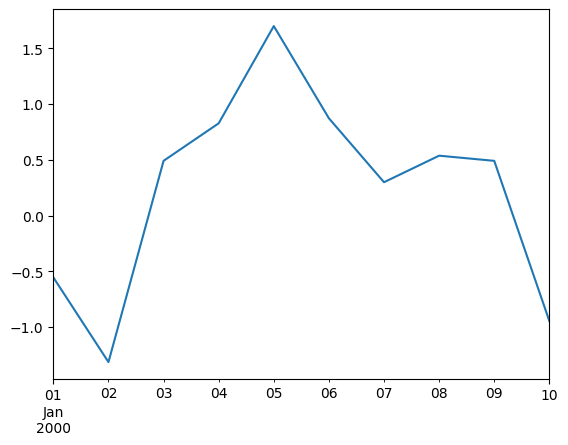

In [79]:
ts.plot()

In [81]:
df_pl = pd.DataFrame(np.random.rand(10,4),index=ts.index,columns=["A","B","C","D"])

In [82]:
df_pl = df.cumsum()

In [83]:
plt.figure();

<Figure size 640x480 with 0 Axes>

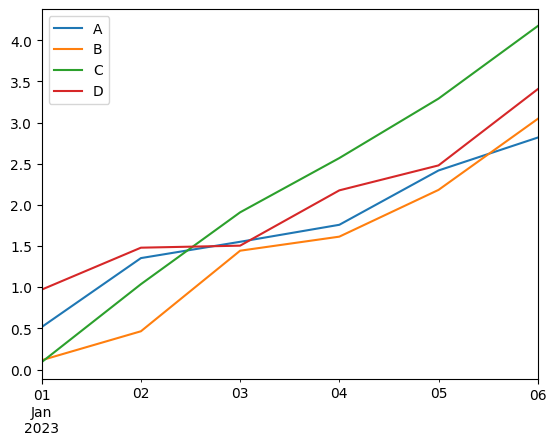

In [74]:
df_pl.plot()
plt.legend(loc="best")

__Importing and exporting data__